## What my peers are learning?

### Wordcrowding Online Courses Data from Harvard and MIT
Author: Li Liu

Date: 12/15/2018

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Data from Kaggle: https://www.kaggle.com/edx/course-study

In [21]:
df=pd.read_csv("appendix.csv")
df.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


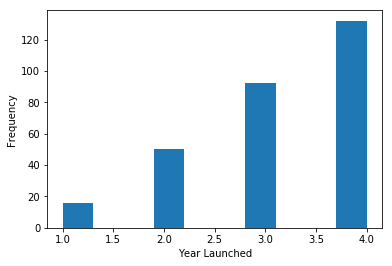

In [22]:
#Histpgram plots
df['Year'].plot(kind='hist')
plt.xlabel("Year Launched")
plt.show()

In [26]:
#Courses categories
set(df['Course Subject'])

{'Computer Science',
 'Government, Health, and Social Science',
 'Humanities, History, Design, Religion, and Education',
 'Science, Technology, Engineering, and Mathematics'}

In [24]:
df.groupby("Institution").count()
#MIT has more courses than Harvard

,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
Institution,,,,,,,,,,,,,,,,,,,,,
HarvardX,129,129,129,128,129,129,129,129,129,129,...,129,129,129,129,129,129,129,129,129,129
MITx,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161


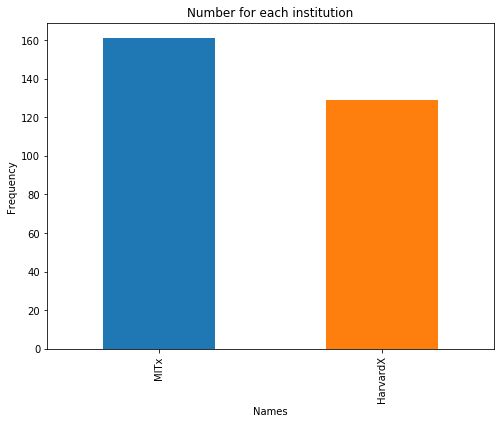

In [28]:
Ct = df['Institution'].value_counts().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Number for each institution")
Ct.set_xlabel("Names")
Ct.set_ylabel("Frequency")
plt.show()

In [29]:
df.groupby('Year').count()
#Increasing number of courses

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
Year,,,,,,,,,,,,,,,,,,,,,
1,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
3,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
4,132,132,132,132,131,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132


In [30]:
df.groupby(["Institution",'Year']).median()

Honor Code Certificates  \
Institution Year                            
HarvardX    1                         1.0   
            2                         1.0   
            3                         1.0   
            4                         1.0   
MITx        1                         1.0   
            2                         1.0   
            3                         1.0   
            4                         1.0   

                  Participants (Course Content Accessed)  \
Institution Year                                           
HarvardX    1                                    52521.0   
            2                                    12621.0   
            3                                     4785.0   
            4                                     2960.0   
MITx        1                                    28535.0   
            2                                    21063.0   
            3                                    12208.0   
            4                                     5645.0   

                  Audited (> 50% Course Content Accessed)  Certified  \
Institution Year                                                       
HarvardX    1                                      9425.0     2743.0   
            2                                      2873.0     1637.0   
            3                                      1832.0      453.0   
            4                                       831.0      244.5   
MITx        1                                      3543.0     2082.0   
            2                                      2357.0      940.0   
            3                                      1567.0      505.0   
            4                                       951.0      132.0   

                  % Audited  % Certified  \
Institution Year                           
HarvardX    1        16.050        9.260   
            2        21.200        7.470   
            3        36.450        9.480   
            4        32.430       10.120   
MITx        1        14.270        8.320   
            2        15.080        5.620   
            3        17.460        5.180   
            4        19.105        3.095   

                  % Certified of > 50% Course Content Accessed  \
Institution Year                                                 
HarvardX    1                                           51.070   
            2                                           45.690   
            3                                           38.690   
            4                                           28.975   
MITx        1                                           61.160   
            2                                           38.170   
            3                                           32.770   
            4                                           15.705   

                  % Posted in Forum  % Grade Higher Than Zero  \
Institution Year                                                
HarvardX    1                 14.48                    20.980   
            2                 16.74                    32.620   
            3                 11.99                    24.910   
            4                  8.95                    12.590   
MITx        1                 10.30                    28.970   
            2                  9.47                    25.930   
            3                  6.32                    19.500   
            4                  4.96                    16.385   

                  Total Course Hours (Thousands)  \
Institution Year                                   
HarvardX    1                            186.610   
            2                             47.900   
            3                             17.310   
            4                             10.455   
MITx        1                            279.220   
            2                             97.280   
            3                             65.350   
            4           

In [36]:
#Get the course with oldest learners 
#df.iloc[df['Median Age'].idxmax()]
#Or
df.sort_values('Median Age').iloc[-1]

Institution                                                                              HarvardX
Course Number                                                                               HAA1x
Launch Date                                                                            03/22/2014
Course Title                                        HarvardX for Alumni: Explorations in Learning
Instructors                                                                               Rob Lue
Course Subject                                  Humanities, History, Design, Religion, and Edu...
Year                                                                                            2
Honor Code Certificates                                                                         0
Participants (Course Content Accessed)                                                       7156
Audited (> 50% Course Content Accessed)                                                       781
Certified           

In [32]:
#Men and women's favorites
pd.Series(df['Course Title'],index=[df['% Male'].idxmax(),df['% Female'].idxmax()])

288               Introduction to State Space Control
286    Introduction to Family Engagement in Education
Name: Course Title, dtype: object

## What my peers are learning?


Catch up with your peer of age:23
Hold on...


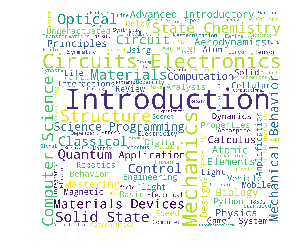

Match with your interests too?


In [35]:
age=input("Catch up with your peer of age:")
#Peers are defined as people within 3 years' age difference.
res=df[(df['Median Age']<=(int(age)+3))&(df['Median Age']>=(int(age)-3))]                                                                                                
print("Hold on...")
wc = WordCloud(stopwords=STOPWORDS,background_color='white',
               width=2000,height=1800).generate(" ".join(res['Course Title']))
plt.imshow(wc)
plt.axis('off')
plt.show()
print("Match with your interests too?")